In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('/content/Data (2).csv')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,9.0,38.777778,7.693793,27.0,35.0,38.0,44.0,50.0
Salary,9.0,63777.777778,12265.579662,48000.0,54000.0,61000.0,72000.0,83000.0


In [ ]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
df.shape

(10, 4)

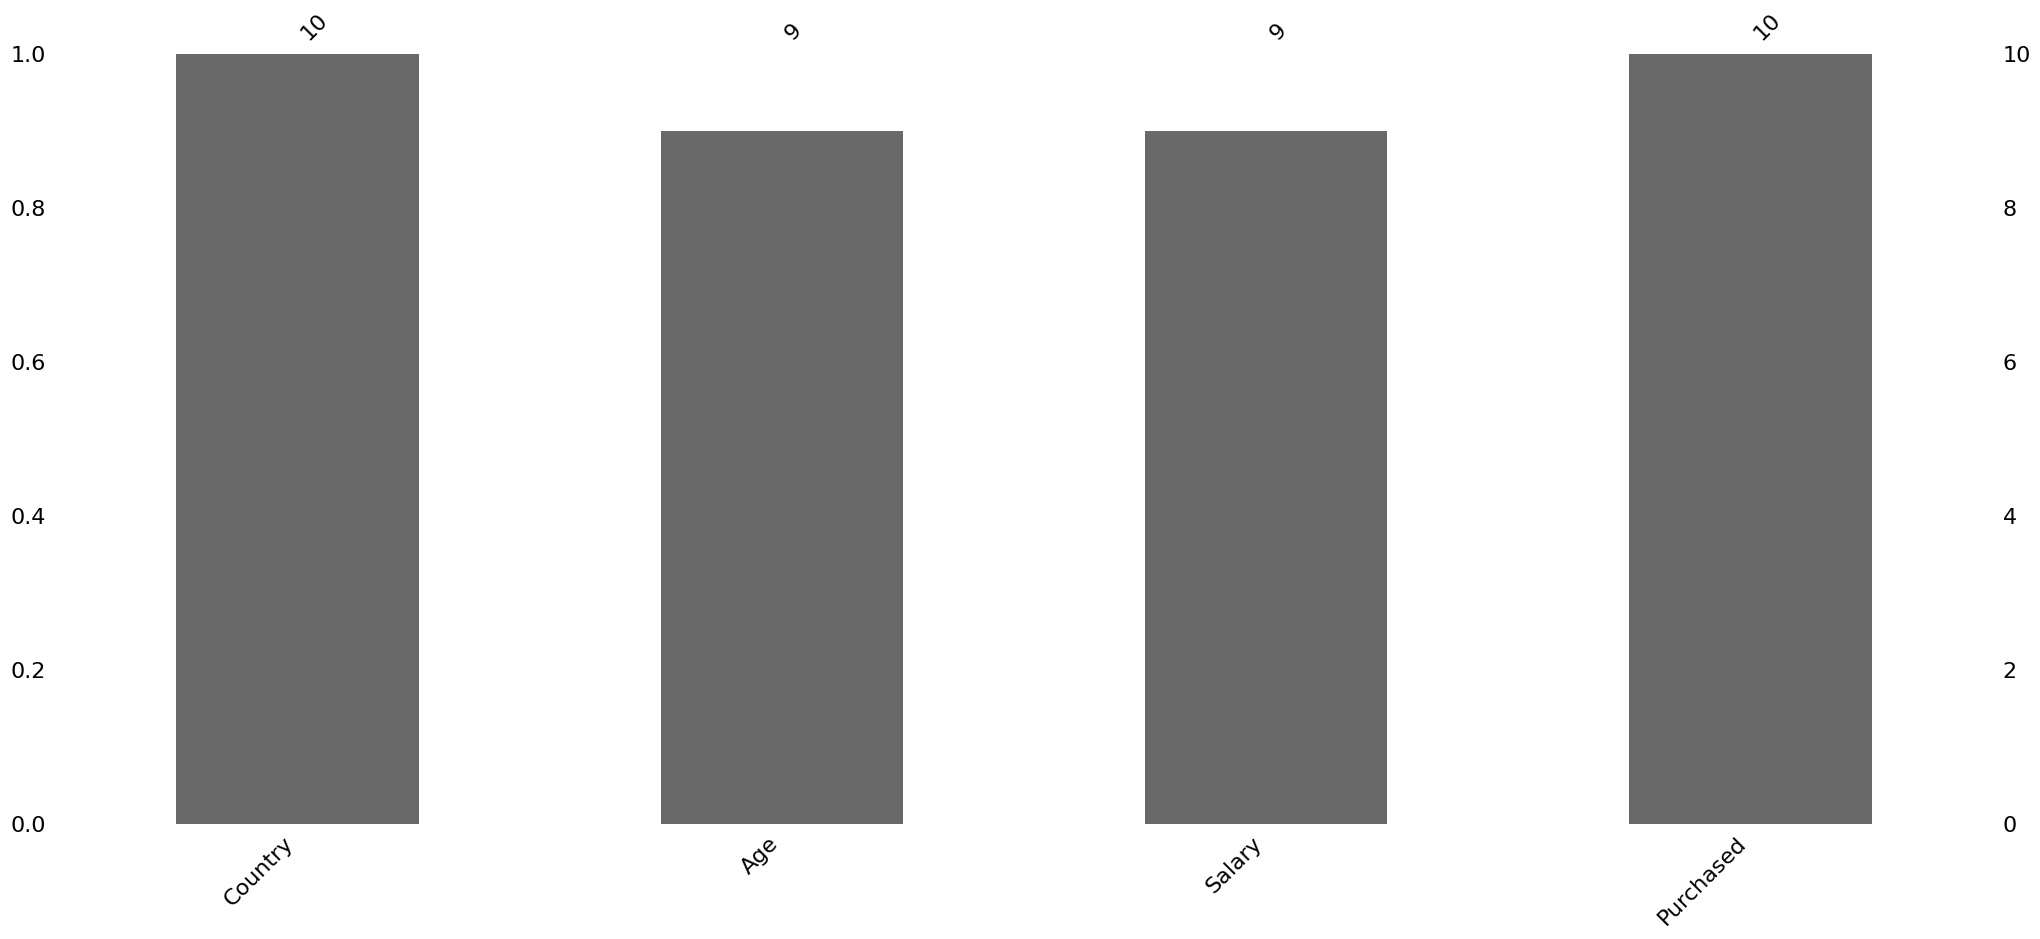

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
import matplotlib.pyplot as plt


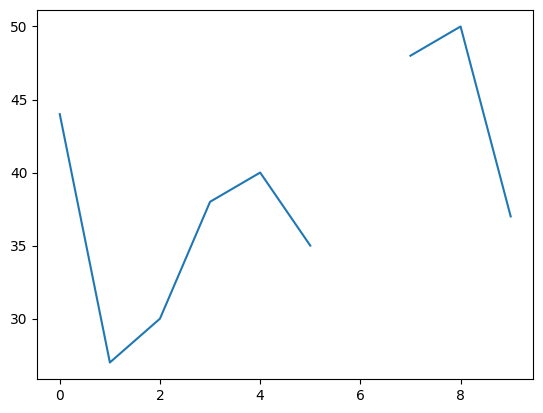

In [ ]:
x = df['Age']
plt.plot(x)

<BarContainer object of 10 artists>

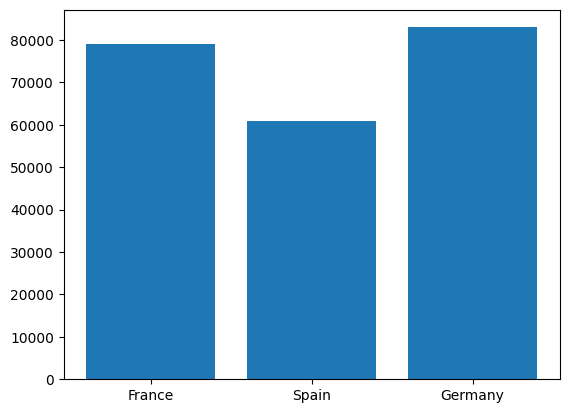

In [ ]:
x = df['Country']
y = df['Salary']
plt.bar(x,y)

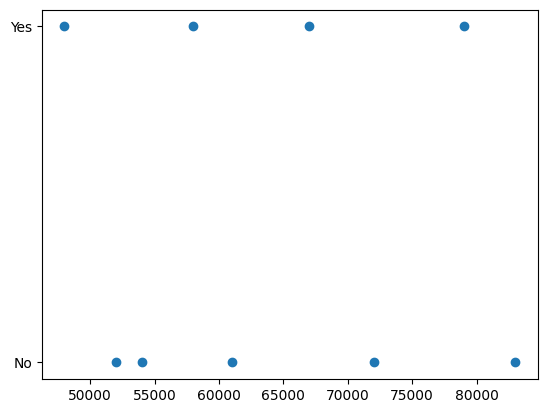

In [ ]:
x = df['Salary']
y = df['Purchased']
plt.scatter(x,y)

In [ ]:
import seaborn as sns

<Axes: xlabel='Country', ylabel='Age'>

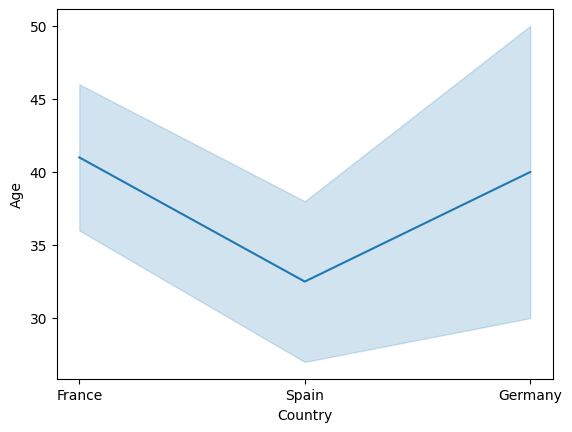

In [ ]:
sns.lineplot(x=df['Country'],y=df['Age'])

<Axes: xlabel='Purchased', ylabel='count'>

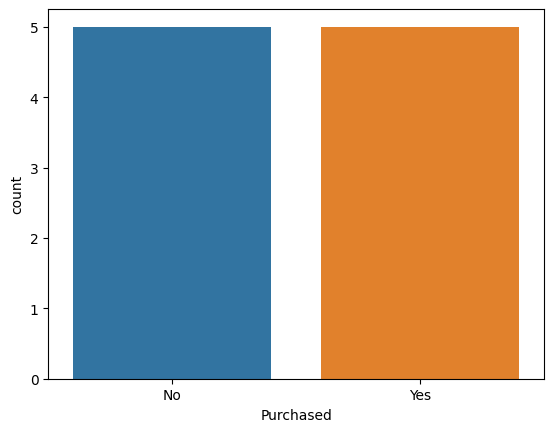

In [ ]:
sns.countplot(x=df['Purchased'])

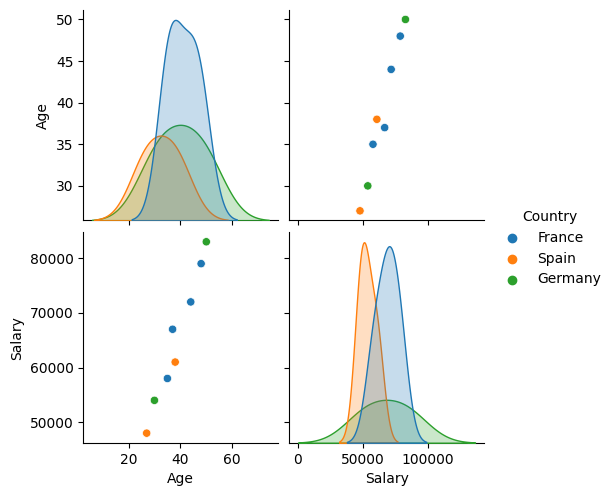

In [ ]:
sns.pairplot(df,hue='Country')

<ipython-input-62-78ccc73ec116>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Salary'])


<Axes: ylabel='Density'>

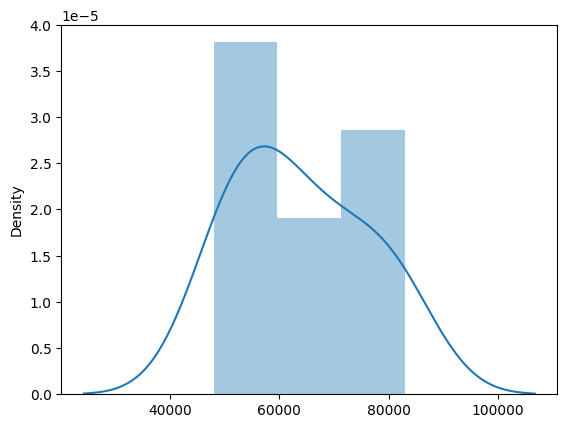

In [ ]:
sns.distplot(x=df['Salary'])

<Axes: xlabel='Purchased', ylabel='Count'>

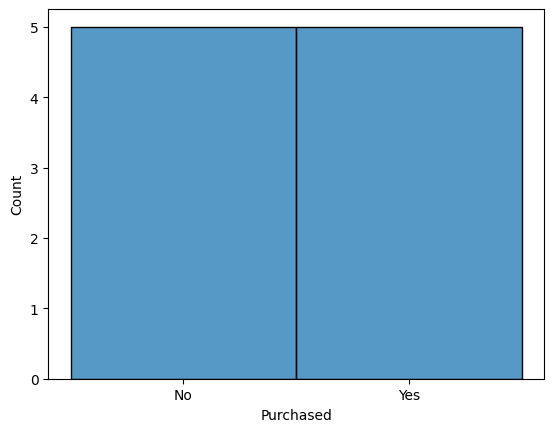

In [ ]:
sns.histplot(x=df['Purchased'])

<Axes: xlabel='Salary'>

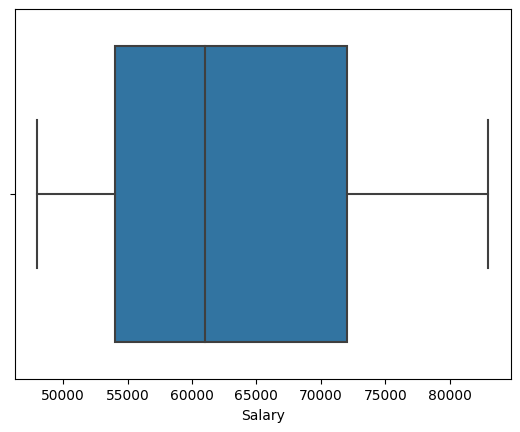

In [ ]:
sns.boxplot(x=df['Salary'])

In [ ]:
x=df.iloc[:,:-1].values
print(x)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
y=df.iloc[:,-1].values
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
df1 = df.copy()

In [ ]:
df1.dropna(inplace=True)
print(df1)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
df2 = df.copy()

In [ ]:
df2.fillna(df2.mode(), inplace=True)
df2
#df2.fillna(df2.median(), inplace=True)
#df2.fillna(df2.mean(), inplace=True)


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
Imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
Imputer.fit(x[:,1:3])
x[:,1:3]=Imputer.transform(x[:,1:3])
x


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)